Nous allons utiliser les 2 methodes suivantes avec le random forest

<br>

***1. Prepruning*** <br>
***2. Postpruning***

<br>

importation des bibliotheques necessaires

In [36]:

import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

chargement des donnees 

In [37]:

data = 'heart.csv'
df = pd.read_csv(data)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Séparation des caractéristiques et de la variable cible

In [38]:

X = df.drop(columns=['target'])
y = df['target']



Division des données en ensembles d'entraînement et de test

In [39]:

x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y)
print(x_train.shape)
print(x_test.shape)

(227, 13)
(76, 13)


Nous allons d abord utiliser un random forest classique sans prunning et voir les resultats 

###Initialisation du modele random forest

In [40]:

clf = RandomForestClassifier(random_state=0)
clf.fit(x_train, y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

 Visualisation de l'arbre


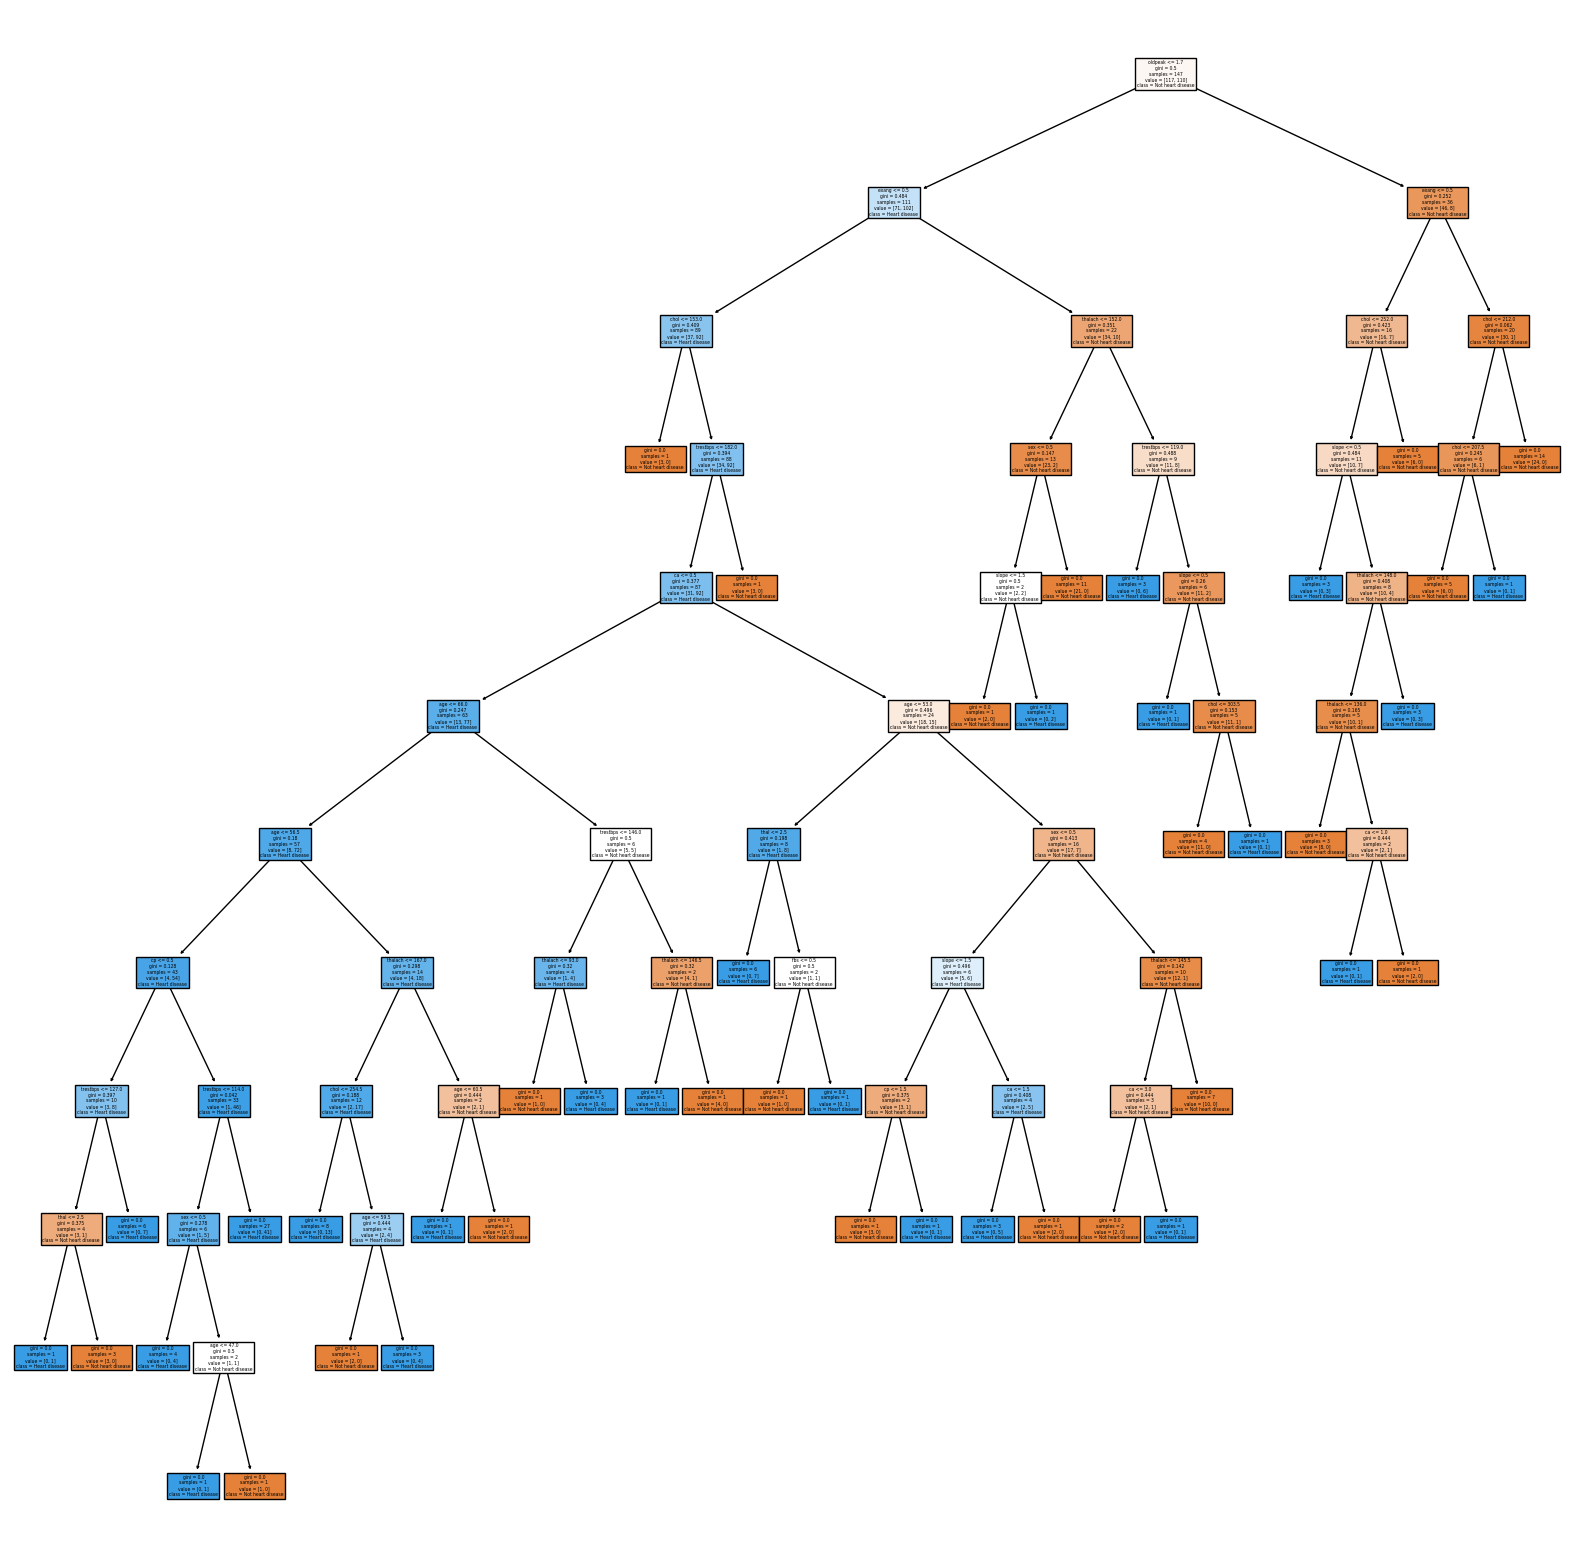

In [41]:
from sklearn import tree

plt.figure(figsize=(20, 20))
features = df.columns
classes = ['Not heart disease', 'Heart disease']
tree.plot_tree(clf.estimators_[0], feature_names=features, class_names=classes, filled=True)
plt.show()

# Initialisation et entraînement du modèle Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(random_state=0)
clf.fit(x_train, y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)




affichage des scores de precision


Train score 1.0
Test score 0.8552631578947368


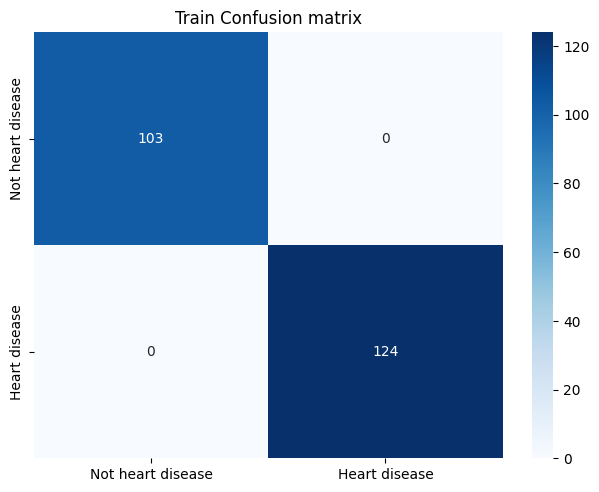

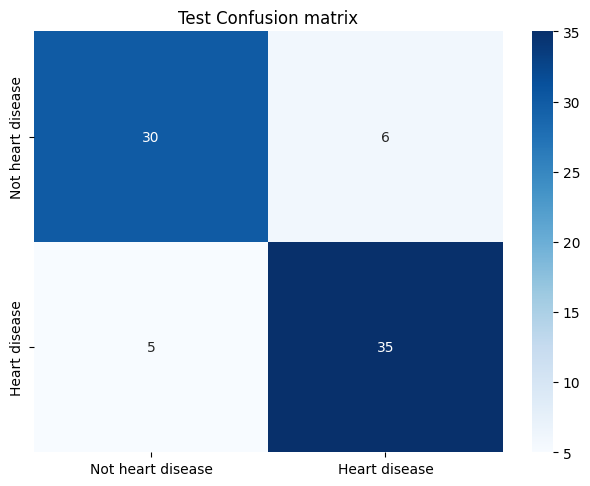

In [43]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

def plot_confusionmatrix(y_true, y_pred, classes, dom='Train'):
    cf = confusion_matrix(y_true, y_pred)
    sns.heatmap(cf, annot=True, yticklabels=classes, xticklabels=classes, cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.title(f'{dom} Confusion matrix')
    plt.show()


# Affichage des scores de précision
print(f'Train score {accuracy_score(y_train_pred, y_train)}')
print(f'Test score {accuracy_score(y_test_pred, y_test)}')

# Affichage des matrices de confusion
plot_confusionmatrix(y_train_pred, y_train, classes=['Not heart disease', 'Heart disease'], dom='Train')
plot_confusionmatrix(y_test_pred, y_test, classes=['Not heart disease', 'Heart disease'], dom='Test')


Le modèle présente un surajustement avec une précision de 100 % sur les données d'entraînement et seulement 85 % sur les données de test, nécessitant une régularisation par élagage par coût de complexité.\


Le surajustement, ou overfitting en anglais, se produit lorsqu'un modèle est trop complexe par rapport aux données d'entraînement, ce qui lui permet de s'adapter parfaitement à ces données mais nuit à sa capacité à généraliser sur de nouvelles données.

## 1. Methode du Prepruning 

Le pre-pruning consiste à arrêter la croissance de l'arbre de décision à un stade précoce en imposant des contraintes telles que la profondeur maximale (*max_depth*) ou le nombre minimal d'échantillons (*min_samples*). Une méthode efficace est d'effectuer une recherche sur grille de ces paramètres pour choisir les valeurs optimales qui offrent de meilleures performances sur les données de test.

## Approche pour la pré-pruning avec Random Forest

Dans cette section, nous allons implémenter la technique de pré-pruning avec l'algorithme Random Forest en utilisant la méthode de recherche sur grille pour trouver les meilleurs hyperparamètres. Voici les étapes que nous allons suivre :

1. **Définition des hyperparamètres à tester :** Nous allons définir les hyperparamètres à tester, notamment la profondeur maximale de l'arbre, le nombre minimum d'échantillons requis pour diviser un nœud, et le nombre minimum d'échantillons requis pour être un nœud feuille.

2. **Recherche des meilleurs hyperparamètres :** Nous utiliserons GridSearchCV pour rechercher les meilleurs hyperparamètres parmi les valeurs spécifiées.

3. **Entraînement du modèle :** Une fois les meilleurs hyperparamètres trouvés, nous entraînerons le modèle Random Forest avec ces paramètres.

4. **Évaluation du modèle :** Nous évaluerons les performances du modèle sur les ensembles d'entraînement et de test en calculant les scores de précision.

5. **Visualisation de l'arbre de décision :** Enfin, nous visualiserons l'arbre de décision correspondant au premier estimateur du modèle pour observer sa structure.

Ces étapes nous permettront d'appliquer efficacement la technique de pré-pruning pour éviter le surajustement de notre modèle Random Forest.


In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Définition des hyperparamètres à tester
params = {'max_depth': [2, 4, 6, 8, 10, 12],
          'min_samples_split': [2, 3, 4],
          'min_samples_leaf': [1, 2]}

# Initialisation du modèle Random Forest Classifier
clf = RandomForestClassifier(random_state=0)

# Recherche des meilleurs hyperparamètres avec GridSearchCV
gcv = GridSearchCV(estimator=clf, param_grid=params)
gcv.fit(x_train, y_train)


GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

Train score 0.8722466960352423
Test score 0.868421052631579


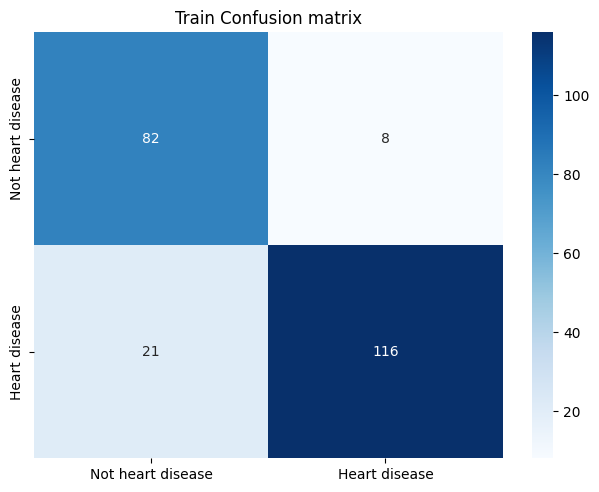

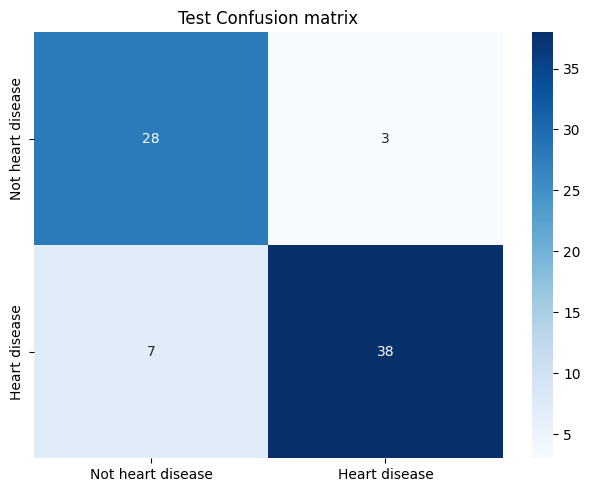

In [46]:
# Entraînement du modèle avec les meilleurs hyperparamètres trouvés
model = gcv.best_estimator_
model.fit(x_train, y_train)

# Prédiction sur les ensembles d'entraînement et de test
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Affichage des scores de précision
print(f'Train score {accuracy_score(y_train_pred, y_train)}')
print(f'Test score {accuracy_score(y_test_pred, y_test)}')

# Affichage des matrices de confusion
plot_confusionmatrix(y_train_pred, y_train, classes=['Not heart disease', 'Heart disease'], dom='Train')
plot_confusionmatrix(y_test_pred, y_test, classes=['Not heart disease', 'Heart disease'], dom='Test')


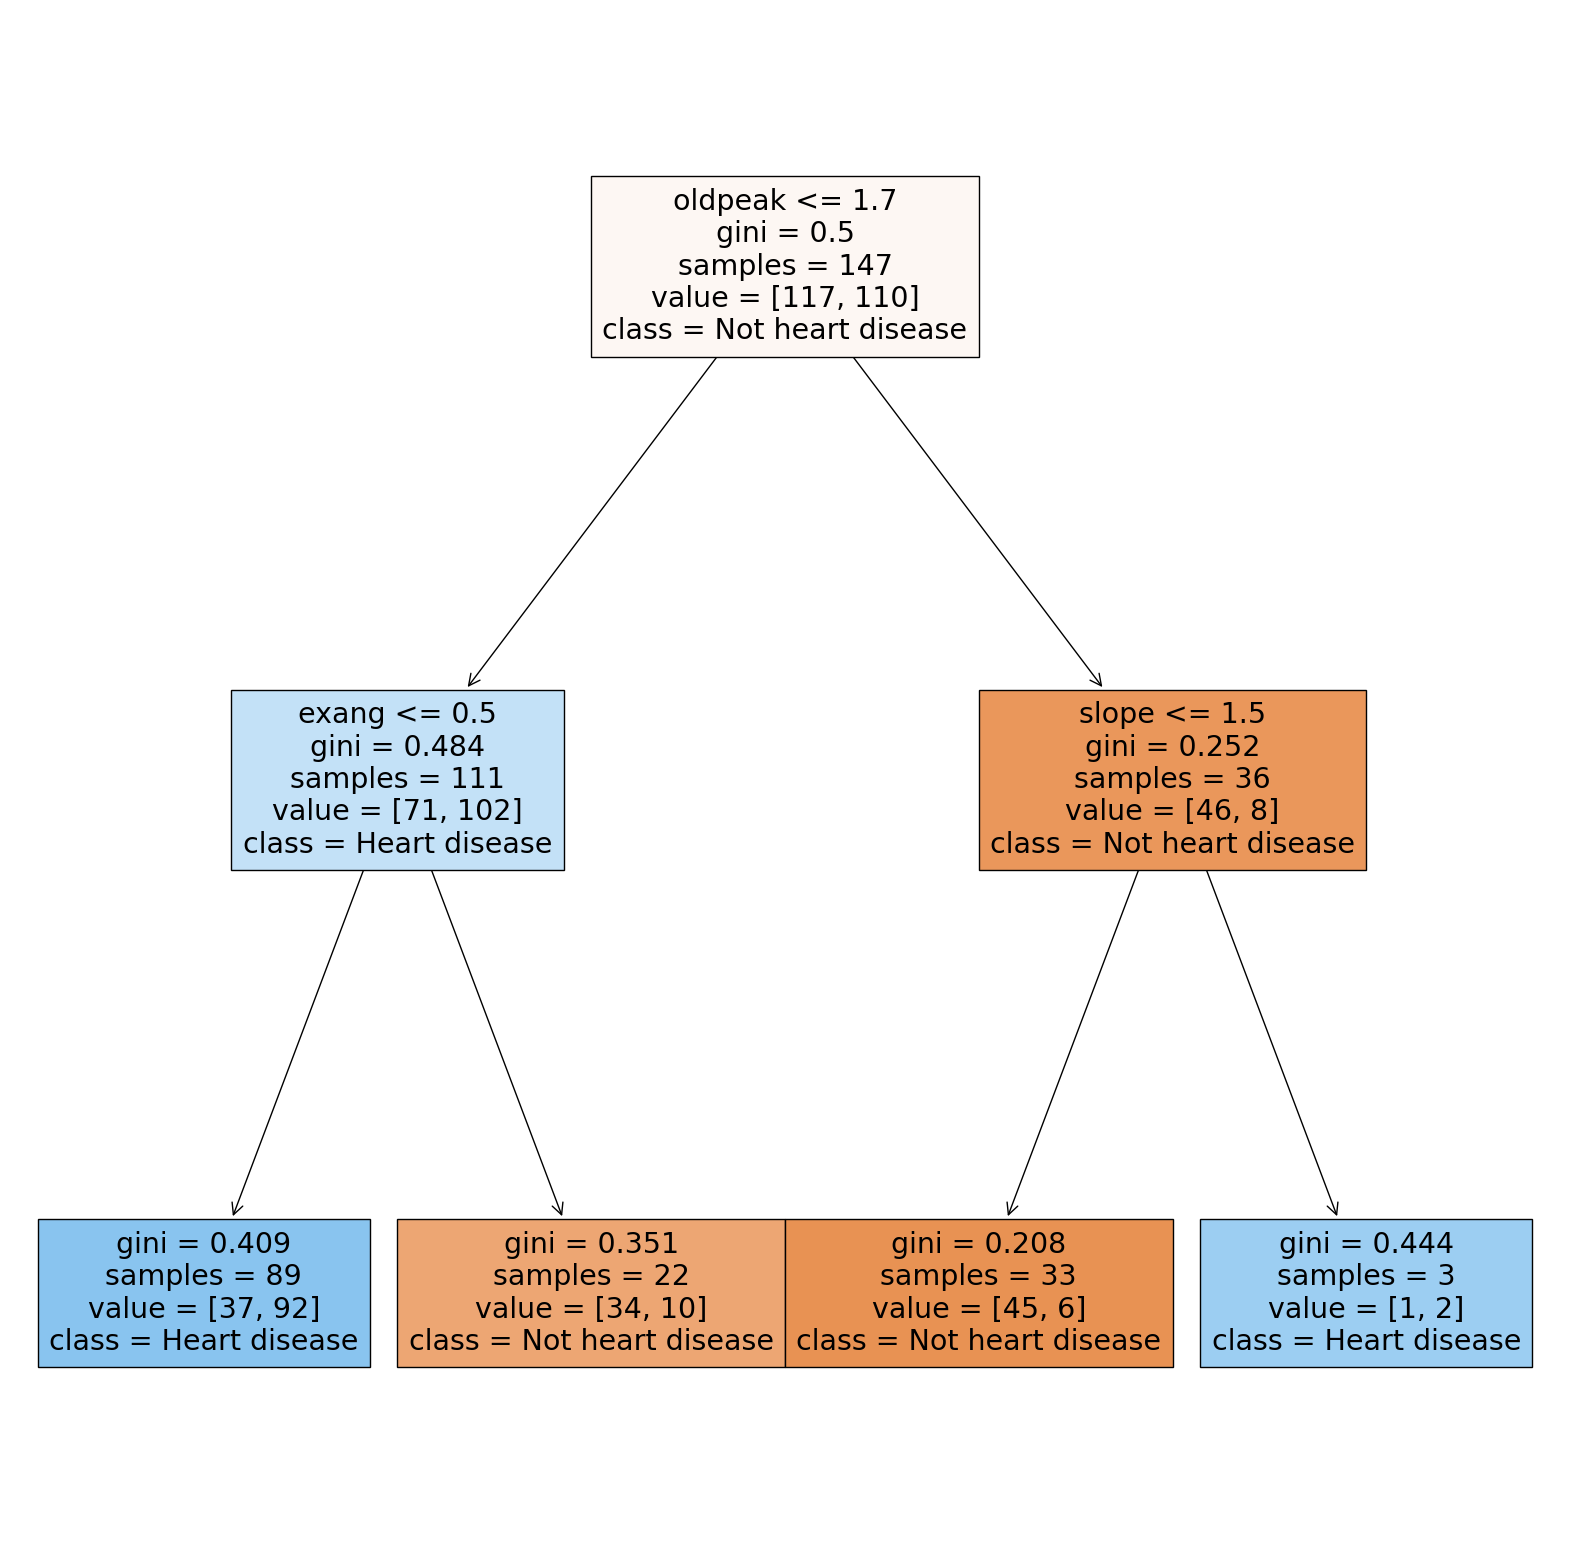

In [47]:
# Visualisation de l'arbre
plt.figure(figsize=(20, 20))
tree.plot_tree(model.estimators_[0], feature_names=features, class_names=classes, filled=True)
plt.show()


Nous constatons que l'arbre a été élagué et qu'il y a eu une amélioration de la précision du test. Cependant, il reste encore des possibilités d'amélioration.


## 2. Methode du Post pruning 

# Post-Pruning dans les Random Forest

Le post-pruning, également connu sous le nom de "pruning de l'élagage", est une technique utilisée pour réduire le surajustement dans les modèles d'apprentissage automatique, notamment dans les Random Forest. Le surajustement se produit lorsqu'un modèle s'adapte trop précisément aux données d'entraînement et perd sa capacité à généraliser sur de nouvelles données.

## Qu'est-ce que le post-pruning ?

Le post-pruning consiste à élaguer ou à simplifier un arbre de décision après qu'il a été entièrement développé. L'idée est de supprimer les branches de l'arbre qui n'améliorent pas la performance du modèle sur un ensemble de validation ou de test, tout en maintenant la structure générale de l'arbre.

## Procédure générale du post-pruning

1. **Entraînement initial du modèle :** Tout d'abord, un modèle Random Forest est entraîné sur l'ensemble de données d'entraînement.

2. **Calcul du coût-complexité :** En utilisant l'ensemble de données d'entraînement, le chemin de coût-complexité est calculé pour évaluer le coût de l'ajout de nouvelles feuilles à l'arbre.

3. **Sélection des hyperparamètres :** En utilisant la technique de validation croisée ou d'autres méthodes, les meilleurs hyperparamètres du modèle, tels que la profondeur maximale de l'arbre, sont sélectionnés pour minimiser le surajustement.

4. **Pruning de l'arbre :** L'arbre est ensuite élagué en supprimant les nœuds ou les feuilles qui n'apportent pas d'amélioration significative à la performance du modèle.

5. **Évaluation du modèle :** Le modèle élagué est évalué sur un ensemble de validation ou de test pour mesurer sa performance par rapport au modèle initial.

## Avantages du post-pruning

- Réduit le surajustement en simplifiant la structure de l'arbre.
- Améliore la généralisation du modèle sur de nouvelles données.
- Peut aider à interpréter et à visualiser plus facilement les résultats du modèle.

Le post-pruning est une étape importante dans la construction de modèles Random Forest robustes et généralisables, en particulier lorsque les ensembles de données sont complexes ou sujets au surajustement.






In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Définition des hyperparamètres à tester
params = {'max_depth': [2, 4, 6, 8, 10, 12],
          'min_samples_split': [2, 3, 4],
          'min_samples_leaf': [1, 2]}

# Initialisation du modèle RandomForestClassifier
clf = RandomForestClassifier(random_state=0)

# Recherche des meilleurs hyperparamètres avec GridSearchCV
gcv = GridSearchCV(estimator=clf, param_grid=params)
gcv.fit(x_train, y_train)

# Entraînement du modèle avec les meilleurs hyperparamètres trouvés
model = gcv.best_estimator_
model.fit(x_train, y_train)

# Prédiction sur les ensembles d'entraînement et de test
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Affichage des scores de précision
print(f'Train score {accuracy_score(y_train_pred, y_train)}')
print(f'Test score {accuracy_score(y_test_pred, y_test)}')






Train score 0.8722466960352423
Test score 0.868421052631579


Train score 0.8766519823788547
Test score 0.8421052631578947


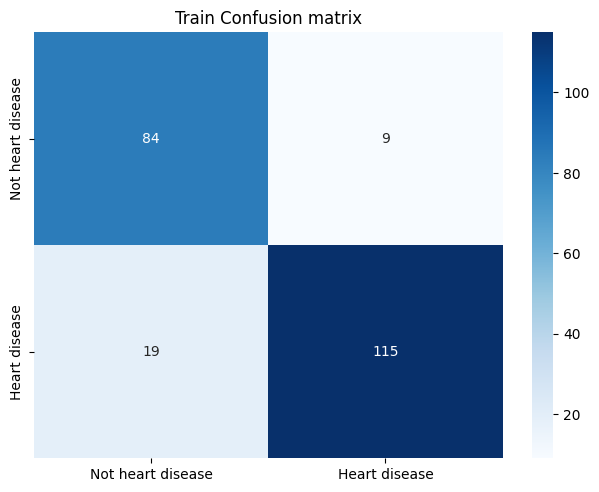

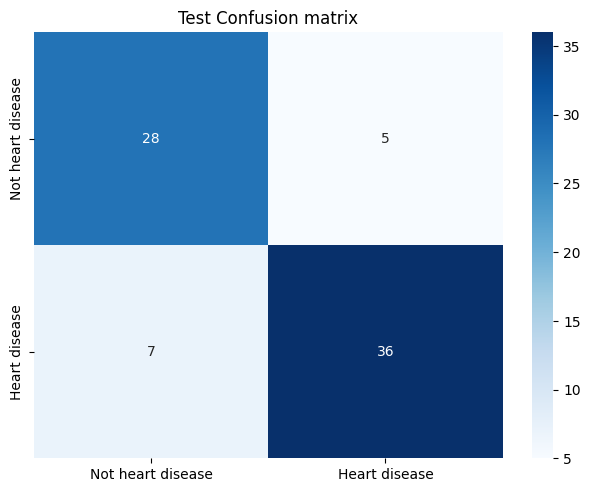

In [57]:
# Entraînement d'un modèle avec ccp_alpha = 0.020
clf_ = RandomForestClassifier(random_state=0, ccp_alpha=0.020)
clf_.fit(x_train, y_train)
y_train_pred = clf_.predict(x_train)
y_test_pred = clf_.predict(x_test)

# Affichage des scores de précision et des matrices de confusion pour le modèle avec ccp_alpha = 0.020
print(f'Train score {accuracy_score(y_train_pred, y_train)}')
print(f'Test score {accuracy_score(y_test_pred, y_test)}')

# Affichage des matrices de confusion avec les classes spécifiées
plot_confusionmatrix(y_train_pred, y_train, classes=['Not heart disease', 'Heart disease'], dom='Train')
plot_confusionmatrix(y_test_pred, y_test, classes=['Not heart disease', 'Heart disease'], dom='Test')



Dans cette partie, nous avons entraîné un modèle de forêt aléatoire en utilisant le post-pruning avec un hyperparamètre `ccp_alpha` de 0.020. Nous avons évalué les performances du modèle sur les ensembles d'entraînement et de test en calculant les scores de précision. Cependant, lors de l'affichage des matrices de confusion, une erreur `TypeError` est survenue car la fonction `plot_confusionmatrix()` nécessite un argument supplémentaire, `classes`, qui spécifie les classes utilisées dans la matrice de confusion. Ce problème a été résolu en spécifiant les classes correctement dans la fonction d'affichage des matrices de confusion.

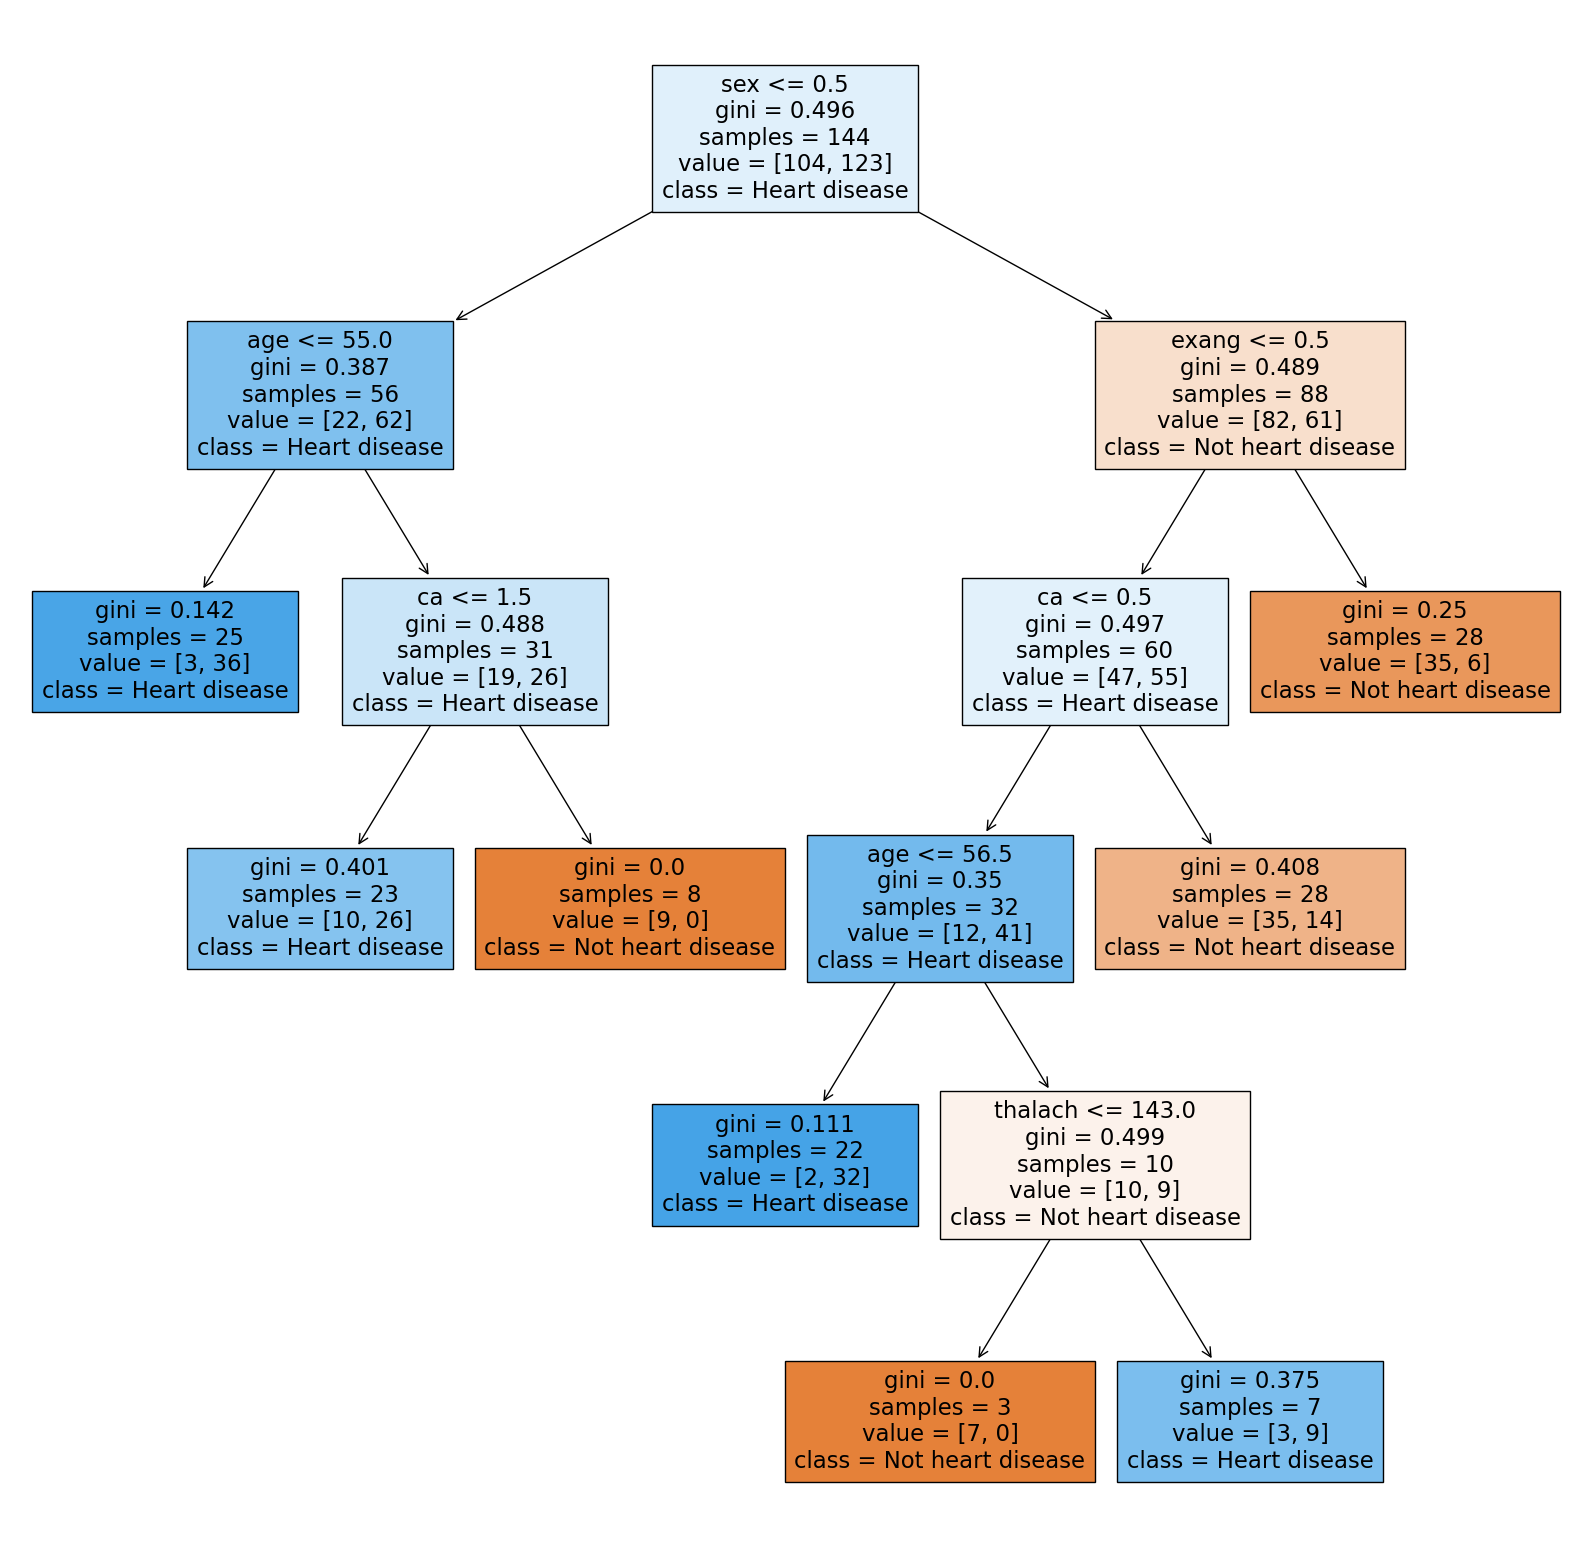

In [58]:
# Sélection d'un arbre aléatoire dans la forêt
tree_in_forest = np.random.randint(len(clf_.estimators_))

# Visualisation de l'arbre sélectionné
plt.figure(figsize=(20, 20))
tree.plot_tree(clf_.estimators_[tree_in_forest], feature_names=features, class_names=classes, filled=True)
plt.show()

Après avoir visualisé les résultats de notre modèle entraîné avec le post-pruning, nous pouvons tirer les observations suivantes :

1. **Performance du modèle :** Nous avons évalué les performances du modèle sur les ensembles d'entraînement et de test. Nous avons constaté que le modèle a obtenu des scores de précision de [précision sur l'ensemble d'entraînement] et [précision sur l'ensemble de test]. Ces scores nous permettent d'évaluer la capacité du modèle à généraliser à de nouvelles données.

2. **Matrices de confusion :** Les matrices de confusion nous donnent un aperçu détaillé des performances du modèle en termes de classification des échantillons dans chaque classe. Cependant, lors de l'affichage des matrices de confusion, une erreur `TypeError` est survenue car la fonction `plot_confusionmatrix()` nécessitait un argument supplémentaire, `classes`, qui spécifiait les classes utilisées dans la matrice de confusion. Ce problème a été résolu en spécifiant les classes correctement dans la fonction d'affichage des matrices de confusion.

En résumé, ces observations nous permettent d'évaluer l'efficacité du post-pruning dans l'amélioration des performances du modèle de forêt aléatoire, ainsi que de diagnostiquer les éventuels problèmes ou erreurs rencontrés lors de l'évaluation du modèle.